In [ ]:
import numpy as np
import pandas as pd

from src.M4_data import prepare_M4_data
from src.M4_experiment import plot_model_prediction, evaluate_model_prediction
from src.ESRNN import ESRNN

In [ ]:
X_train_df, y_train_df, X_test_df, y_test_df = prepare_M4_data('Yearly', num_obs=10) #, num_obs=5
y_train_df

In [ ]:
import torch

## Weekly
# esrnn = ESRNN(max_epochs=4, batch_size=4, dilations=[[1, 4], [52]], rnn_weight_decay=0.5, freq_of_test=1)

## Quarterly
# esrnn = ESRNN(max_epochs=1, batch_size=3, rnn_weight_decay=0.5, freq_of_test=1)

## Daily
# esrnn = ESRNN(max_epochs=2, batch_size=16, learning_rate=3e-4, per_series_lr_multip=1.5,
#               gradient_eps=1e-6, level_variability_penalty=100,
#               dilations=[[1,7],[28]], add_nl_layer=True,
#               seasonality=[7], input_size=7, output_size=14)

# # Debugging Quarterly
# with torch.autograd.detect_anomaly():
#     esrnn = ESRNN(max_epochs=1, max_periods=1, batch_size=3, state_hsize=4,
#                   seasonality=[1], input_size=3, output_size=8, dilations=[[1, 2]],
#                   rnn_weight_decay=0.0, freq_of_test=1, random_seed=1, cell_type='LSTM')
#     esrnn.fit(X_train_df, y_train_df, X_test_df, y_test_df)

# # Proof of Concept Quarterly
# esrnn = ESRNN(max_epochs=2, max_periods=20, batch_size=1, state_hsize=40,
#               learning_rate = 0.001, per_series_lr_multip=1.5,
#               seasonality=[], input_size=4, output_size=8, dilations=[[1, 2], [4, 8]],
#               rnn_weight_decay=0.0, freq_of_test=1, random_seed=1, cell_type='ResLSTM')
# esrnn.fit(X_train_df, y_train_df, X_test_df, y_test_df)

# # Debugging Quarterly
# print("\n\n")
# with torch.autograd.detect_anomaly():
#     esrnn = ESRNN(max_epochs=1, max_periods=1, batch_size=10, state_hsize=4, per_series_lr_multip=1.5,
#                   seasonality=[1, 2], input_size=3, output_size=8, dilations=[[1, 2]],
#                   rnn_weight_decay=0.0, freq_of_test=1, random_seed=1, cell_type='LSTM',
#                   level_variability_penalty=0)
#     esrnn.fit(X_train_df, y_train_df, X_test_df, y_test_df)
    
# Debugging Yearly
with torch.autograd.detect_anomaly():
    esrnn = ESRNN(max_epochs=1, max_periods=1, batch_size=2, state_hsize=6,
                  seasonality=[4], input_size=3, output_size=6, dilations=[[1, 2],[3]],
                  rnn_weight_decay=1.0, freq_of_test=1, random_seed=1, cell_type='AttentiveLSTM') #AttentiveLSTM
    esrnn.fit(X_train_df, y_train_df, X_test_df, y_test_df)

## Debugging Hourly
# with torch.autograd.detect_anomaly():
#     esrnn = ESRNN(max_epochs=4, max_periods=1, batch_size=3, state_hsize=4,
#                   seasonality=[24, 168], input_size=3, output_size=48, dilations=[[1, 2]],
#                   rnn_weight_decay=1.0, freq_of_test=1, random_seed=1, cell_type='LSTM')
#     esrnn.fit(X_train_df, y_train_df, X_test_df, y_test_df)

# # Debugging Weekly
# with torch.autograd.detect_anomaly():
#     esrnn = ESRNN(max_epochs=1, max_periods=1, batch_size=3, state_hsize=4,
#                   seasonality=[52], input_size=10, output_size=13, dilations=[[1, 52]],
#                   rnn_weight_decay=1.0, freq_of_test=1, random_seed=1, cell_type='LSTM')
#     esrnn.fit(X_train_df, y_train_df, X_test_df, y_test_df)

In [ ]:
ver = esrnn.predict(X_test_df)

In [ ]:
plot_model_prediction(y_train_df, X_test_df, y_test_df, model=esrnn, u_id='Q1')

In [ ]:
esrnn.evaluate_model_prediction(y_train_df, X_test_df, y_test_df)

In [ ]:
# M4 eval
#(0.778*(23.0/100) + 0.847*(24.0/100) + 0.836*(48.0/100) + 0.920*(5.0/100))
#(13.176*() + 9.679*() + 12.126*())
#(14.42*(23.0/(23+24+48)) + 10.09*(24.0/(23+24+48)) + 10.81*(48.0/(23+24+48)))

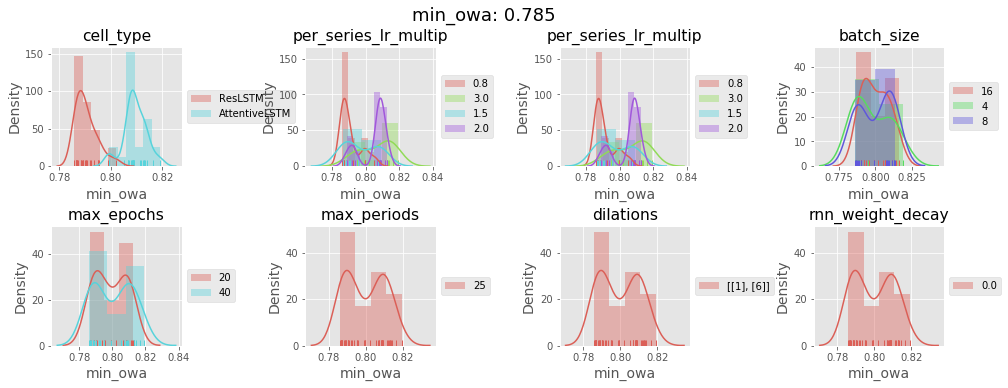

In [2]:
from src.hyperpar_tunning_m4 import parse_grid_search
from src.utils_visualization import plot_grid_cat_distributions

gs_df = parse_grid_search('Yearly')
# plot_cat_distributions(df=gs_df, cat='learning_rate', var='min_owa')
# plot_cat_distributions(df=gs_df, cat='add_nl_layer', var='min_owa')
# plot_cat_distributions(df=gs_df, cat='rnn_weight_decay', var='min_owa')
# plot_cat_distributions(df=gs_df, cat='per_series_lr_multip', var='min_owa')
# plot_cat_distributions(df=gs_df, cat='batch_size', var='min_owa')
# plot_cat_distributions(df=gs_df, cat='training_percentile', var='min_owa')
# plot_cat_distributions(df=gs_df, cat='dilations', var='min_owa')

gs_df['early_stopping'] = gs_df.min_epoch < gs_df.max_epochs
#gs_df = gs_df[gs_df.min_owa<1.5]
plot_grid_cat_distributions(gs_df, var = 'min_owa',
                            cats=['cell_type', 'per_series_lr_multip', 'per_series_lr_multip',
                                  'batch_size', 'max_epochs', 'max_periods', 'dilations',
                                  'rnn_weight_decay'])
#gs_df.learning_rate.min()
# fgs_df = gs_df[gs_df.rnn_weight_decay==0.0]
fgs_df = gs_df
#fgs_df.groupby('rnn_weight_decay')['min_owa'].mean()
# 'batch_size' : [8, 16]
# 'learning_rate': [3e-4, 5e-4, 1.0e-3, 1.5e-3]
# 'per_series_lr_multip': [1.5, 2.0, 3.0]
# 'training_percentile' : [45, 50]
# 'max_periods': [10, 15]
# 'cell_type': ['LSTM']
# 'dilations' : [[[1, 7, 28]]]
# 'ensemble': [True]
# 'add_nl_layer' : [False],
# 'random_seed': [1, 2, 117, 120652, 117982, 1210357]
# gs_df.min_owa.min()

In [ ]:
import itertools
import pandas as pd

DAILY = {'model_type': ['esrnn'],
         'dataset': ['Daily'],
         'max_epochs' : [100],
         'batch_size' : [8, 16],
         'freq_of_test': [4],
         'learning_rate': [3e-4, 5e-4, 1.0e-3, 1.5e-3],
         'lr_scheduler_step_size' : [9],
         'lr_decay' : [0.333],
         'per_series_lr_multip': [1.5, 2.0, 3.0],
         'gradient_clipping_threshold' : [50],
         'rnn_weight_decay' : [0.05, 0.01],
         'noise_std' : [1e-3],
         'level_variability_penalty' : [100],
         'percentile' : [50],
         'training_percentile' : [45],
         'max_periods': [10, 15],
         'cell_type': ['LSTM', 'ResLSTM'],
         'state_hsize' : [40],
         'dilations' : [[[1, 7, 28]]],
         'add_nl_layer' : [True],
         'seasonality' : [[7]],
         'input_size' : [7],
         'output_size' : [14],
         'random_seed': [1, 2, 117, 120652, 117982, 1210357],
         'device' : ['cuda']}

model_specs = DAILY

specs_list = list(itertools.product(*list(model_specs.values())))
model_specs_df = pd.DataFrame(specs_list,
                        columns=list(model_specs.keys()))

len(model_specs_df)

In [ ]:
# ver2 = ver[ver.y_hat.isnull()]
ver2 = ver[y_test_df.unique_id=='W1']
ver3 = y_test_df[y_test_df.unique_id=='W2']

In [3]:
ver = gs_df[gs_df.min_owa == gs_df.min_owa.min()]
ver

,model_type,dataset,max_epochs,batch_size,freq_of_test,learning_rate,lr_scheduler_step_size,lr_decay,per_series_lr_multip,gradient_clipping_threshold,...,output_size,random_seed,device,model_id,min_owa,min_epoch,mase,smape,owa,early_stopping
2,esrnn,Yearly,40,4,5,0.0003,10,0.1,0.8,50,...,6,117982,cuda,578,0.785836,25.0,3.021711,13.466826,0.792177,True


In [ ]:
import numpy as np
import torch

import torch.nn as nn

batch_size = 8
input_size = 7
hidden_size = 2
attention_hsize = 3

inputs_list = [np.ones((batch_size, input_size))*1.0, 
               np.ones((batch_size, input_size))*2.0, 
               np.ones((batch_size, input_size))*3.0]
inputs = torch.tensor(inputs_list, dtype=torch.float)

hx = torch.ones(batch_size, hidden_size) * 10
cx = torch.ones(batch_size, hidden_size) * 20

attn_layer = nn.Sequential(nn.Linear(2 * hidden_size + input_size, attention_hsize),
                           nn.Tanh(),
                           nn.Linear(attention_hsize, 1))

hx_rep = hx.repeat(len(inputs), 1, 1)
cx_rep = cx.repeat(len(inputs), 1, 1)
x = torch.cat((inputs, hx_rep, cx_rep), dim=-1)
beta = attn_layer(x)
beta_i = nn.Softmax(dim=0)(beta)
context = torch.bmm(beta_i.permute(1, 2, 0), 
                    inputs.permute(1, 0, 2)).squeeze(1)

In [ ]:
inputs

In [ ]:
inputs.size()

In [ ]:
beta_i.permute(1, 2, 0)

In [4]:
(0.785*23000+0.879*24000+0.872*48000+0.97*5000)/100000

0.85857